# Homework 5, Part 2: Answer questions with pandas

**Use the Excel file to answer the following questions.** This is a little more typical of what your data exploration will look like with pandas.

## 0) Setup

Import pandas **with the correct name** .

In [1]:
import pandas as pd

/Users/jessieblaeser/.pyenv/versions/3.10.0/lib/python3.10/site-packages/pandas/compat/__init__.py:124: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


## 1) Reading in an Excel file

Use pandas to read in the `richpeople.xlsx` Excel file, saving it as a variable with the name we'll always use for a dataframe.

> **TIP:** You will use `read_excel` instead of `read_csv`. Trying `read_excel` the first time will probably not work, you'll get an error message. Be sure to read the error carefully: *you probably need to install a new library before it will work, and the error tells you what the library is named*.

In [3]:
pip install openpyxl

     |████████████████████████████████| 242 kB 2.1 MB/s eta 0:00:01    |████████▏                       | 61 kB 2.1 MB/s eta 0:00:01
You should consider upgrading via the '/Users/jessieblaeser/.pyenv/versions/3.10.0/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [2]:
pd.read_excel("richpeople.xlsx")

,year,name,rank,citizenship,countrycode,networthusbillion,selfmade,typeofwealth,gender,age,...,relationshiptocompany,foundingdate,gdpcurrentus,sourceofwealth,notes,notes2,source,source_2,source_3,source_4
0,2014,A. Jerrold Perenchio,663,United States,USA,2.6,self-made,executive,male,83.0,...,former chairman and CEO,1955.0,NaN,"television, Univision",represented Marlon Brando and Elizabeth Taylor,NaN,http://en.wikipedia.org/wiki/Jerry_Perenchio,http://www.forbes.com/profile/a-jerrold-perenc...,COLUMN ONE; A Hollywood Player Who Owns the Ga...,NaN
1,2014,Abdulla Al Futtaim,687,United Arab Emirates,ARE,2.5,inherited,inherited,male,NaN,...,relation,1930.0,NaN,"auto dealers, investments",company split between him and cousin in 2000,NaN,http://en.wikipedia.org/wiki/Al-Futtaim_Group,http://www.al-futtaim.ae/content/groupProfile.asp,NaN,NaN
2,2014,Abdulla bin Ahmad Al Ghurair,305,United Arab Emirates,ARE,4.8,inherited,inherited,male,NaN,...,relation,1960.0,NaN,diversified,inherited from father,NaN,http://en.wikipedia.org/wiki/Al-Ghurair_Group,http://www.alghurair.com/about-us/our-history,NaN,NaN
3,2014,Abdullah Al Rajhi,731,Saudi Arabia,SAU,2.4,self-made,self-made finance,male,NaN,...,founder,1957.0,NaN,banking,NaN,NaN,http://en.wikipedia.org/wiki/Al-Rajhi_Bank,http://www.alrajhibank.com.sa/ar/investor-rela...,http://www.alrajhibank.com.sa/ar/about-us/page...,NaN
4,2014,Abdulsamad Rabiu,1372,Nigeria,NGA,1.2,self-made,founder non-finance,male,54.0,...,founder,1988.0,NaN,"sugar, flour, cement",NaN,NaN,http://www.forbes.com/profile/abdulsamad-rabiu/,http://www.bloomberg.com/research/stocks/priva...,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1648,2014,Zhu Yicai,1154,China,CHN,1.5,self-made,self-made finance,male,49.0,...,founder,1993.0,NaN,diversified,NaN,NaN,http://www.forbes.com/profile/zhu-yicai/,NaN,NaN,NaN
1649,2014,Ziyad Manasir,609,Russia,RUS,2.8,self-made,privatized and resources,male,48.0,...,founder,1992.0,NaN,construction,close ties with Gazprom,NaN,http://www.forbes.com/profile/ziyad-manasir/,http://www.themoscowtimes.com/business/article...,NaN,NaN
1650,2014,Ziyaudin Magomedov,1372,Russia,RUS,1.2,self-made,privatized and resources,male,45.0,...,founder,2004.0,NaN,"port, gas",NaN,NaN,http://www.summagroup.ru/about/history/en/,http://www.forbes.com/profile/ziyaudin-magomedov/,NaN,NaN
1651,2014,Zong Qinghou,94,China,CHN,11.6,self-made,founder non-finance,male,68.0,...,founder,1987.0,NaN,beverages,NaN,NaN,http://en.wikipedia.org/wiki/Zong_Qinghou,http://mic.com/articles/39659/zong-qinghou-chi...,NaN,NaN


In [7]:
df = pd.read_excel("richpeople.xlsx")

## 2) Checking your data

Display the number of rows and columns in your data. Also display the names and data types of each column.

In [8]:
df.shape

(1653, 30)

In [9]:
df.columns

Index(['year', 'name', 'rank', 'citizenship', 'countrycode',
       'networthusbillion', 'selfmade', 'typeofwealth', 'gender', 'age',
       'industry', 'IndustryAggregates', 'region', 'north',
       'politicalconnection', 'founder', 'generationofinheritance', 'sector',
       'company', 'companytype', 'relationshiptocompany', 'foundingdate',
       'gdpcurrentus', 'sourceofwealth', 'notes', 'notes2', 'source',
       'source_2', 'source_3', 'source_4'],
      dtype='object')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1653 entries, 0 to 1652
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   year                     1653 non-null   int64  
 1   name                     1653 non-null   object 
 2   rank                     1653 non-null   int64  
 3   citizenship              1653 non-null   object 
 4   countrycode              1653 non-null   object 
 5   networthusbillion        1653 non-null   float64
 6   selfmade                 1651 non-null   object 
 7   typeofwealth             1651 non-null   object 
 8   gender                   1653 non-null   object 
 9   age                      1590 non-null   float64
 10  industry                 1652 non-null   object 
 11  IndustryAggregates       1652 non-null   object 
 12  region                   1653 non-null   object 
 13  north                    1653 non-null   int64  
 14  politicalconnection     

## 3) Who are the top 10 richest billionaires? Use the `networthusbillion` column.

In [11]:
df.head(10).sort_values(by='networthusbillion', ascending=False)

,year,name,rank,citizenship,countrycode,networthusbillion,selfmade,typeofwealth,gender,age,...,relationshiptocompany,foundingdate,gdpcurrentus,sourceofwealth,notes,notes2,source,source_2,source_3,source_4
5,2014,Abigail Johnson,50,United States,USA,17.3,inherited,inherited,female,52.0,...,relation,1946.0,NaN,money management,3rd generation,no male siblings,"http://en.wikipedia.org/wiki/Edward_Johnson,_III",https://www.fidelity.com/about-fidelity/our-he...,NaN,NaN
2,2014,Abdulla bin Ahmad Al Ghurair,305,United Arab Emirates,ARE,4.8,inherited,inherited,male,NaN,...,relation,1960.0,NaN,diversified,inherited from father,NaN,http://en.wikipedia.org/wiki/Al-Ghurair_Group,http://www.alghurair.com/about-us/our-history,NaN,NaN
8,2014,Adi Godrej,446,India,IND,3.5,inherited,inherited,male,71.0,...,relation,1897.0,NaN,consumer goods,3rd generation,NaN,http://en.wikipedia.org/wiki/Godrej_family,http://www.forbes.com/profile/godrej/,NaN,NaN
6,2014,Abilio dos Santos Diniz,609,Brazil,BRA,2.8,inherited,inherited,male,77.0,...,relation,1948.0,NaN,retail,"kidnapped for 6 days in 1989, inherited from f...",NaN,http://en.wikipedia.org/wiki/Ab%C3%ADlio_Diniz,http://www.forbes.com/profile/abilio-dos-santo...,NaN,NaN
0,2014,A. Jerrold Perenchio,663,United States,USA,2.6,self-made,executive,male,83.0,...,former chairman and CEO,1955.0,NaN,"television, Univision",represented Marlon Brando and Elizabeth Taylor,NaN,http://en.wikipedia.org/wiki/Jerry_Perenchio,http://www.forbes.com/profile/a-jerrold-perenc...,COLUMN ONE; A Hollywood Player Who Owns the Ga...,NaN
1,2014,Abdulla Al Futtaim,687,United Arab Emirates,ARE,2.5,inherited,inherited,male,NaN,...,relation,1930.0,NaN,"auto dealers, investments",company split between him and cousin in 2000,NaN,http://en.wikipedia.org/wiki/Al-Futtaim_Group,http://www.al-futtaim.ae/content/groupProfile.asp,NaN,NaN
3,2014,Abdullah Al Rajhi,731,Saudi Arabia,SAU,2.4,self-made,self-made finance,male,NaN,...,founder,1957.0,NaN,banking,NaN,NaN,http://en.wikipedia.org/wiki/Al-Rajhi_Bank,http://www.alrajhibank.com.sa/ar/investor-rela...,http://www.alrajhibank.com.sa/ar/about-us/page...,NaN
7,2014,Achmad Hamami,1092,Indonesia,IDN,1.6,self-made,founder non-finance,male,83.0,...,founder,1980.0,NaN,heavy equipment,NaN,NaN,http://www.forbes.com/profile/achmad-hamami/,http://www.trakindo.co.id/website/pages/compan...,NaN,NaN
4,2014,Abdulsamad Rabiu,1372,Nigeria,NGA,1.2,self-made,founder non-finance,male,54.0,...,founder,1988.0,NaN,"sugar, flour, cement",NaN,NaN,http://www.forbes.com/profile/abdulsamad-rabiu/,http://www.bloomberg.com/research/stocks/priva...,NaN,NaN
9,2014,Aerin Lauder Zinterhofer,1465,United States,USA,1.1,inherited,inherited,female,44.0,...,relation,1946.0,NaN,"inherited, cosmetics",3rd generation,NaN,http://en.wikipedia.org/wiki/Jane_Lauder,http://investing.businessweek.com/research/sto...,NaN,NaN


## 4) How many male billionaires are there compared to the number of female billionares? What percent is that? Do they have a different average wealth?

> **TIP:** The last part uses `groupby`, but the count/percent part does not.
> **TIP:** When I say "average," you can pick what kind of average you use.

In [12]:
df.gender.value_counts()

male      1473
female     180
Name: gender, dtype: int64

In [13]:
len(df.index)
rows = len(df.index)


In [14]:
df[df.gender == 'female']
fem_bill = df[df.gender == 'female']
                   
df[df.gender == 'male']
male_bill = df[df.gender == 'male']

#male_bill / rows
#perct_male = male_bill / rows
#perct_male
#QUESTION: what happened here? 

In [15]:
total_male = 0
for male in male_bill: 
    if male:
        total_male = total_male + 1
        
total_male

30

In [16]:
male_bill.shape

(1473, 30)

## 5) What is the most common source/type of wealth? Is it different between males and females?

> **TIP:** You know how to `groupby` and you know how to count how many times a value is in a column. Can you put them together???
> **TIP:** Use percentages for this, it makes it a lot more readable.

In [39]:
df.typeofwealth.value_counts()
#QUESTION: how do i do value counts for the COUNT of a string? Do i need to save each 'typeofwealth' as a vaiable? 
    # Also the above function does put them in descending order, so...is there a need to do more? 

df.typeofwealth.value_counts(ascending=False)


inherited                   506
founder non-finance         467
self-made finance           344
privatized and resources    192
executive                   142
Name: typeofwealth, dtype: int64

In [20]:
male_bill.typeofwealth.value_counts()

founder non-finance         446
inherited                   364
self-made finance           338
privatized and resources    187
executive                   136
Name: typeofwealth, dtype: int64

In [21]:
fem_bill.typeofwealth.value_counts()
# Yes, for male and female billionares who have listed their 'typeofwealth,' most male billionaires fall in the "founder non-finance" category -->
    # while most female billionaires have inherited their wealth. 

inherited                   142
founder non-finance          21
self-made finance             6
executive                     6
privatized and resources      5
Name: typeofwealth, dtype: int64

## 6) What companies have the most billionaires? Graph the top 5 as a horizontal bar graph.

> **TIP:** First find the answer to the question, then just try to throw `.plot()` on the end
>
> **TIP:** You can use `.head()` on *anything*, not just your basic `df`
>
> **TIP:** You might feel like you should use `groupby`, but don't! There's an easier way to count.
>
> **TIP:** Make the largest bar be at the top of the graph
>
> **TIP:** If your chart seems... weird, think about where in the process you're sorting vs using `head`

<AxesSubplot:title={'center':'comps with the most bills'}>

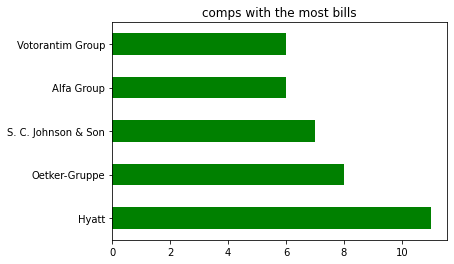

In [49]:
#df.company.value_counts(ascending=False)

# df.company.value_counts(ascending=False).plot.barh(x='company', y='number of bills',
#              title='comps with the most bills', color='green')
#omg!!!! 
df.company.value_counts(ascending=False).head(5).plot.barh(x='company', y='number of bills',
             title='comps with the most bills', color='green')


## 7) How much money do these billionaires have in total?

In [152]:
# top_comps = df.company.value_counts(ascending=False).head(5)

# top_comps.networthusbillion.sum()

# df.company.value_counts(ascending=False).head(5).networthusbillion.sum()
df.networthusbillion.sum()
print(f'${df.networthusbillion.sum():.2f} bilion')
print(f'In other words, these billionaries hold about $6.45 tillion')

$6454.40 bilion
In other words, these billionaries hold about $6.45 tillion


## 8) What are the top 10 countries with the most money held by billionaires?

I am **not** asking which country has the most billionaires - this is **total amount of money per country.**

> **TIP:** Think about it in steps - "I want them organized by country," "I want their net worth," "I want to add it all up," and "I want 10 of them." Just chain it all together.

In [159]:
#df.groupby(by='countrycode').networthusbillion.sum().value_counts(ascending=False)
#bill_money_by_country = df.groupby(by='countrycode').networthusbillion.sum().reset_index()

#bill_money_by_country.sort_values(by='countrycode', ascending=False).head(10)
#QUESTION: why isn't this sorted in order??

df.groupby(by='countrycode').networthusbillion.sum().sort_values().tail(10)


countrycode
GBR     152.0
ITA     158.1
IND     191.9
BRA     192.2
HKG     213.7
FRA     235.3
CHN     375.8
DEU     401.4
RUS     422.5
USA    2322.4
Name: networthusbillion, dtype: float64

## 9) How old is an average billionaire? How old are self-made billionaires  vs. non self-made billionaires? 

In [131]:
df.age.mean()
avg_age = df.age.mean()

print(f'The average age of billionares is {avg_age:.0f} years')

The average age of billionares is 63 years


In [129]:
#df.columns
#df.value_counts('selfmade')
df[df.selfmade == 'self-made']
self_made = df[df.selfmade == 'self-made']
self_made.head()
self_made.age.mean()
print(f'The average age of self-made billionaires is {self_made.age.mean():.0f} years')

The average age of self-made billionaires is 63 years


In [130]:
#df.value_counts('selfmade')
df[df.selfmade == 'inherited']
inherited_wealth = df[df.selfmade == 'inherited']
inherited_wealth.head()
inherited_wealth.age.mean()
print(f'The average age of non-self-made billionaires is {inherited_wealth.age.mean():.0f} years')

The average age of non-self-made billionaires is 65 years


## 10) Who are the youngest billionaires? Who are the oldest? Make a graph of the distribution of ages.

> **TIP:** You use `.plot()` to graph values in a column independently, but `.hist()` to draw a [histogram](https://www.mathsisfun.com/data/histograms.html) of the distribution of their values

In [105]:
# #df
# df.name.str.endswith('kardashian')
# kardashian = df[df.name.str.endswith('kardashian')]
# kardashian

# Here is a list of the 10 youngest billionaries in this df (I tried to see if I could find Kendall Jenner or Kim Kardashian above, but they are not listed!)
df.sort_values(by='age').head(10)

,year,name,rank,citizenship,countrycode,networthusbillion,selfmade,typeofwealth,gender,age,...,relationshiptocompany,foundingdate,gdpcurrentus,sourceofwealth,notes,notes2,source,source_2,source_3,source_4
1172,2014,Perenna Kei,1284,Hong Kong,HKG,1.3,inherited,inherited,female,24.0,...,relation,1996.0,NaN,real estate,inherited from father,NaN,http://en.wikipedia.org/wiki/Perenna_Kei,http://www.loganestate.com/en/about.aspx?ftid=294,NaN,NaN
397,2014,Dustin Moskovitz,202,United States,USA,6.8,self-made,founder non-finance,male,29.0,...,founder,2004.0,NaN,Facebook,NaN,NaN,http://en.wikipedia.org/wiki/Dustin_Moskovitz,http://www.forbes.com/profile/dustin-moskovitz/,https://www.facebook.com/facebook/info?tab=pag...,NaN
1004,2014,Mark Zuckerberg,21,United States,USA,28.5,self-made,founder non-finance,male,29.0,...,founder,2004.0,NaN,Facebook,NaN,NaN,http://www.forbes.com/profile/mark-zuckerberg/,NaN,NaN,NaN
127,2014,"Anton Kathrein, Jr.",1270,Germany,DEU,1.4,inherited,inherited,male,29.0,...,relation,1919.0,NaN,antennas,3rd generation,NaN,http://www.forbes.com/profile/anton-kathrein-jr/#,NaN,NaN,NaN
394,2014,Drew Houston,1372,United States,USA,1.2,self-made,founder non-finance,male,30.0,...,founder,2007.0,NaN,Dropbox,NaN,NaN,http://en.wikipedia.org/wiki/Drew_Houston,http://en.wikipedia.org/wiki/Dropbox_(service),http://www.forbes.com/profile/drew-houston/,NaN
28,2014,Albert von Thurn und Taxis,1092,Germany,DEU,1.6,inherited,inherited,male,30.0,...,relation,1615.0,NaN,diversified,"monopoly on postal service in germany, nationa...","two older sisters, did not inherit title becau...",http://en.wikipedia.org/wiki/Thurn_und_Taxis,"http://en.wikipedia.org/wiki/Albert,_12th_Prin...",NaN,NaN
406,2014,Eduardo Saverin,367,Brazil,BRA,4.1,self-made,founder non-finance,male,31.0,...,founder,2004.0,NaN,Facebook,NaN,NaN,http://en.wikipedia.org/wiki/Eduardo_Saverin,http://www.bloomberg.com/news/articles/2012-05...,NaN,NaN
1340,2014,Scott Duncan,215,United States,USA,6.3,inherited,inherited,male,31.0,...,relation,1968.0,NaN,pipelines,inherited from father,NaN,http://en.wikipedia.org/wiki/Scott_Duncan_(bus...,http://www.forbes.com/profile/dannine-avara/,NaN,NaN
1607,2014,Yang Huiyan,196,China,CHN,6.9,inherited,inherited,female,32.0,...,relation,1997.0,NaN,real estate,inherited from father,NaN,http://en.wikipedia.org/wiki/Yang_Huiyan,NaN,NaN,NaN
991,2014,Marie Besnier Beauvalot,642,France,FRA,2.7,inherited,inherited,female,33.0,...,relation,1933.0,NaN,cheese,inherited from father,oldest brother is CEO,http://www.forbes.com/profile/emmanuel-besnier/,http://en.wikipedia.org/wiki/Lactalis,NaN,NaN


In [107]:
# Here are the 10 oldest billionaries in the df
df.sort_values(by='age', ascending=False).head(10)


,year,name,rank,citizenship,countrycode,networthusbillion,selfmade,typeofwealth,gender,age,...,relationshiptocompany,foundingdate,gdpcurrentus,sourceofwealth,notes,notes2,source,source_2,source_3,source_4
343,2014,"David Rockefeller, Sr.",580,United States,USA,2.9,inherited,inherited,male,98.0,...,relation,1870.0,NaN,"oil, banking",family made most of fortune in the late 19th a...,NaN,http://en.wikipedia.org/wiki/David_Rockefeller,http://en.wikipedia.org/wiki/Standard_Oil,http://en.wikipedia.org/wiki/Rockefeller_family,NaN
816,2014,Karl Wlaschek,305,Austria,AUT,4.8,self-made,founder non-finance,male,96.0,...,founder,1953.0,NaN,retail,NaN,NaN,http://en.wikipedia.org/wiki/BILLA,http://en.wikipedia.org/wiki/Karl_Wlaschek,https://www.billa.at/Footer_Nav_Seiten/Geschic...,NaN
836,2014,Kirk Kerkorian,328,United States,USA,4.5,self-made,self-made finance,male,96.0,...,investor,1924.0,NaN,"casinos, investments",purchased in 1969,NaN,http://en.wikipedia.org/wiki/Kirk_Kerkorian,http://www.forbes.com/profile/kirk-kerkorian/,PROFILE: Las Vegas billionaire amassed his wea...,NaN
588,2014,Henry Hillman,687,United States,USA,2.5,inherited,inherited,male,95.0,...,relation,1942.0,NaN,investments,inherited from father,NaN,http://www.forbes.com/profile/henry-hillman/,http://en.wikipedia.org/wiki/Calgon_Carbon,NaN,NaN
435,2014,Erika Pohl-Stroher,1154,Germany,DEU,1.5,inherited,inherited,female,95.0,...,relation,1880.0,NaN,hair products,3rd generation,23% stake in the company,http://www.forbes.com/profile/erika-pohl-stroher/,http://en.wikipedia.org/wiki/Wella,NaN,NaN
1428,2014,Sulaiman Al Rajhi,931,Saudi Arabia,SAU,1.9,self-made,self-made finance,male,94.0,...,founder,1957.0,NaN,banking,NaN,NaN,http://en.wikipedia.org/wiki/Al-Rajhi_Bank,http://www.alrajhibank.com.sa/ar/investor-rela...,http://www.alrajhibank.com.sa/ar/about-us/page...,NaN
122,2014,Anne Cox Chambers,58,United States,USA,15.5,inherited,inherited,female,94.0,...,relation,1898.0,NaN,media,inherited from brother,NaN,http://en.wikipedia.org/wiki/Anne_Cox_Chambers,http://www.forbes.com/lists/2010/10/billionair...,http://www.nytimes.com/2007/05/30/business/med...,NaN
815,2014,Karl Albrecht,23,Germany,DEU,25.0,self-made,executive,male,94.0,...,relation,1914.0,NaN,retail,"(split from Aldi Nord in 1966, but both branch...",took over mother's single grocerty store,http://en.wikipedia.org/wiki/Karl_Albrecht,http://www.bloomberg.com/news/articles/2014-07...,http://aldiuscareers.com/about-aldi/history,NaN
77,2014,Aloysio de Andrade Faria,483,Brazil,BRA,3.3,inherited,inherited,male,93.0,...,relation,1925.0,NaN,banking,inherited from father,NaN,http://en.wikipedia.org/wiki/Aloysio_de_Andrad...,http://en.wikipedia.org/wiki/Banco_da_Lavoura_...,http://www.forbes.com/profile/aloysio-de-andra...,NaN
1560,2014,Wang Yung-Tsai,520,Taiwan,Taiwan,3.1,self-made,founder non-finance,male,93.0,...,founder,1954.0,NaN,plastics,NaN,NaN,http://www.forbes.com/profile/wang-yung-tsai/,What's good for the goose South China Morning ...,NaN,NaN


<AxesSubplot:title={'center':'Distribution of Billionaires Age'}, ylabel='Frequency'>

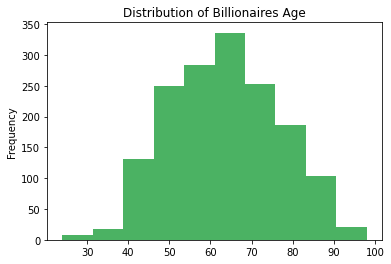

In [121]:
df.age.plot.hist(x='age', y='number of billionaries',
                 title='Distribution of Billionaires Age', color ='#4BB263')


## 11) Make a scatterplot of net worth compared to age

<AxesSubplot:title={'center':'Age and Net Worth of Billionaires'}, xlabel='age', ylabel='networthusbillion'>

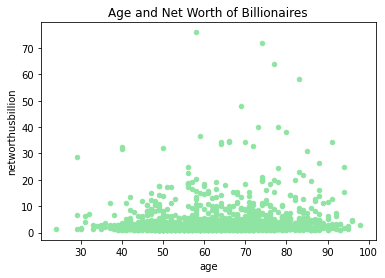

In [122]:
df.plot.scatter(x='age', y='networthusbillion',
               title='Age and Net Worth of Billionaires', c='#8FE4A3')


## 13) Make a bar graph of the wealth of the top 10 richest billionaires

> **TIP:** When you make your plot, you'll need to set the `x` and `y` or else your chart will look _crazy_
>
> **TIP:** x and y might be the opposite of what you expect them to be

<AxesSubplot:title={'center':'Wealth of Top 10 Billionaires'}, xlabel='name'>

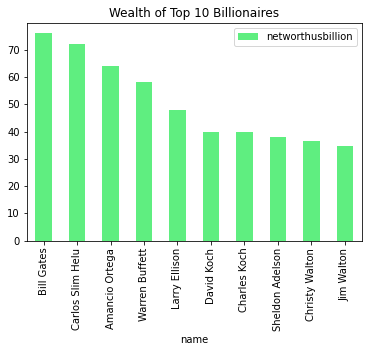

In [120]:
df.sort_values('networthusbillion',ascending=False).head(10).plot.bar(x='name', y='networthusbillion',
                                                                      title='Wealth of Top 10 Billionaires', color='#5FEE80')